## Look at experiment results

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [221]:
DIR = './rewards_over_episodes/'
exp_filenames = sorted([f for f in os.listdir(DIR) if os.path.isfile(DIR+f)])

In [222]:
exp_filenames

['pg-pong-abs-pos-no-ball_vel_100_1',
 'pg-pong-abs-pos-no-ball_vel_100_2',
 'pg-pong-abs-pos-no-ball_vel_50_1',
 'pg-pong-abs-pos-no-ball_vel_50_2',
 'pg-pong-abs-pos-no-ball_vel_and_no_paddle_x_100_1',
 'pg-pong-abs-pos-no-ball_vel_and_no_paddle_x_100_2',
 'pg-pong-abs-pos-no-ball_vel_and_no_paddle_x_50_1',
 'pg-pong-abs-pos-no-ball_vel_and_no_paddle_x_50_2',
 'pg-pong-abs-pos-no-paddle-x_100_1',
 'pg-pong-abs-pos-no-paddle-x_100_2',
 'pg-pong-abs-pos-no-paddle-x_50_1',
 'pg-pong-abs-pos-no-paddle-x_50_2',
 'pg-pong-abs-pos_100_1',
 'pg-pong-abs-pos_100_2',
 'pg-pong-abs-pos_50_1',
 'pg-pong-abs-pos_50_2',
 'pg-pong-py3_100_1',
 'pg-pong-py3_100_2',
 'pg-pong-py3_50_1',
 'pg-pong-py3_50_2',
 'pg-pong-rel-pos-bonus_100_1',
 'pg-pong-rel-pos-bonus_100_2',
 'pg-pong-rel-pos-bonus_100_3',
 'pg-pong-rel-pos-bonus_100_4',
 'pg-pong-rel-pos-bonus_100_5',
 'pg-pong-rel-pos-bonus_100_6',
 'pg-pong-rel-pos-bonus_50_1',
 'pg-pong-rel-pos-bonus_50_2',
 'pg-pong-rel-pos-bonus_smooth_100_1',
 'pg-

#### The experiment files are organized as follows:
 - The first line describes how many hidden neurons were used for the architecture
 - The last line contains end - start time
 - The middles lines contain the episode number and the reward gained

In [224]:
## Gather experiment data into lists
exps = []
for filename in exp_filenames:
    with open(DIR+filename) as fp:
        exp = []
        exp.append(filename)
        for line in fp:
            exp.append(line)
        exps.append(exp)

In [228]:
## Organize experiment results into lists including filename, runtime of experiment, and array of results,
## with the first column representing the episode number, and the second column representing the reward received
exp_results = []
for exp in exps:
    results = []
    filename = exp[0]
    #print(filename)
    #info = exp[1]
    if "smooth" in filename: continue # Not yet complete
    time_to_run = float(exp[-1].strip("\n"))
    for i in range(2,len(exp)-1):
        if exp[i][0] == "r":
            continue
        results.append(np.array(list(map(float, exp[i].strip("\n").rsplit(" ")))))
    results = np.array(results)
    #print(len(results))
    exp_results.append([filename, time_to_run, results])

In [229]:
def get_exps_info(exps, num_experiments=4, avg_over=100):
    total_reward = 0
    running_reward = []
    running_means = []
    variances = []
    res_idx = 2
    rwd_idx = 1
    for i in range(num_experiments):
        running_mean = []
        for j in range(len(exps[i][res_idx])):
            total_reward += exps[i][res_idx][j][rwd_idx]
            running_reward.append(total_reward)
            if j >= avg_over and j % avg_over == 0:
                running_mean.append(np.mean(exps[i][res_idx][j-avg_over:j][:,rwd_idx]))
        variances.append(np.var(exps[i][res_idx][:,1]))
        running_means.append(running_mean)
    return running_reward, running_means, variances

In [251]:
def display_timing_info(exps, num_experiments=4):
    fname_idx=0; time_idx=1
    for i in range(num_experiments):
        print(exps[i][fname_idx] + " took an average of {0:.0f} seconds or {1:.1f} minutes to run".format(exps[i][time_idx], exps[i][time_idx]/60))

# Results grouped by experiment type

In [252]:
abs_no_ball_vel_exps = exp_results[0:4]
abs_no_ball_vel_nor_paddle_x_pos_exps = exp_results[4:8]
abs_no_paddle_x_pos_exps = exp_results[8:12]
abs_pos_exps = exp_results[12:16]
orig_exps = exp_results[16:20]
rel_pos_bonus_exps = exp_results[20:28]
rel_pos_exps = exp_results[28:32]

### Original experiment using a downsampled difference of frames, written by Andrej Karpathy
2 expirements with 50 hidden neurons and 2 experiments with 100 hidden neurons


**Note:** The network trined in the original article used 200 hidden neurons

In [253]:
avg_over = 5000
exps = orig_exps
running_reward, running_means, variances = get_exps_info(orig_exps, avg_over=avg_over)

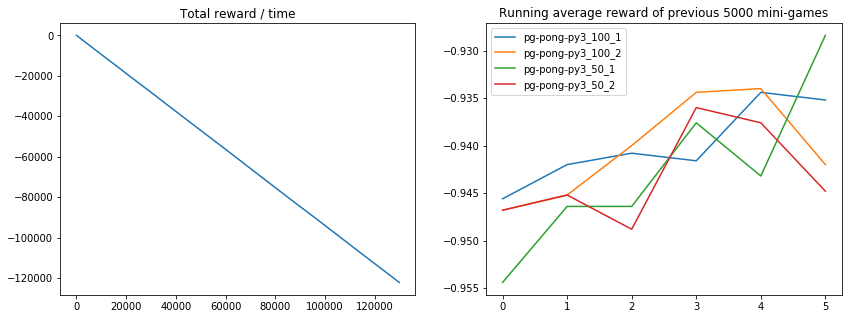

In [254]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title("Total reward / time")
plt.plot(range(len(running_reward)), running_reward)
plt.subplot(122)
plt.title("Running average reward of previous " + str(avg_over) + " mini-games")
plt.plot(range(len(running_means[0])), running_means[0], label=exps[0][0])
plt.plot(range(len(running_means[1])), running_means[1], label=exps[1][0])
plt.plot(range(len(running_means[2])), running_means[2], label=exps[2][0])
plt.plot(range(len(running_means[3])), running_means[3], label=exps[3][0])
plt.legend()

In [255]:
## There was a bug in the timing code for this one
#display_timing_info(exps)

### Absolute Positions of the paddles and ball fed to neural net, along with ball velocity (given by difference in ball position over successive frames)
2 expirements with 50 hidden neurons and 2 experiments with 100 hidden neurons

In [256]:
avg_over = 500
exps = abs_pos_exps
running_reward, running_means, variances = get_exp_info(exps, avg_over=avg_over)

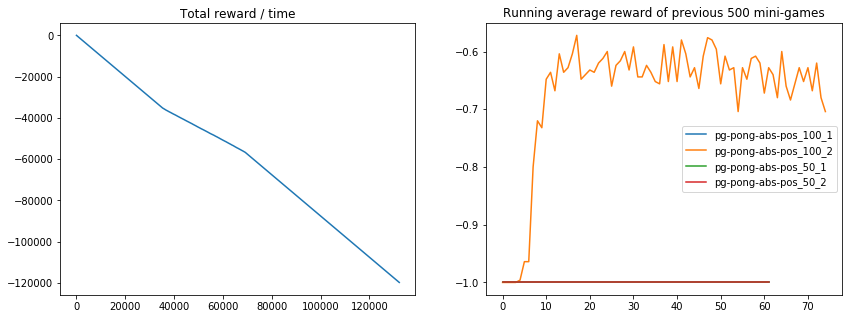

In [257]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title("Total reward / time")
plt.plot(range(len(running_reward)), running_reward)
plt.subplot(122)
plt.title("Running average reward of previous " + str(avg_over) + " mini-games")
plt.plot(range(len(running_means[0])), running_means[0], label=exps[0][0])
plt.plot(range(len(running_means[1])), running_means[1], label=exps[1][0])
plt.plot(range(len(running_means[2])), running_means[2], label=exps[2][0])
plt.plot(range(len(running_means[3])), running_means[3], label=exps[3][0])
plt.legend()

In [258]:
display_timing_info(exps)

pg-pong-abs-pos_100_1 took an average of 6704 seconds or 111.7 minutes to run
pg-pong-abs-pos_100_2 took an average of 9455 seconds or 157.6 minutes to run
pg-pong-abs-pos_50_1 took an average of 6738 seconds or 112.3 minutes to run
pg-pong-abs-pos_50_2 took an average of 6753 seconds or 112.6 minutes to run


### Relative positions of other paddle and ball to agent's paddle, along with ball velocity (given by difference in ball position over successive frames)
2 expirements with 50 hidden neurons and 2 experiments with 100 hidden neurons

In [263]:
avg_over = 500
exps = rel_pos_exps
running_reward, running_means, variances = get_exp_info(exps, avg_over=avg_over)

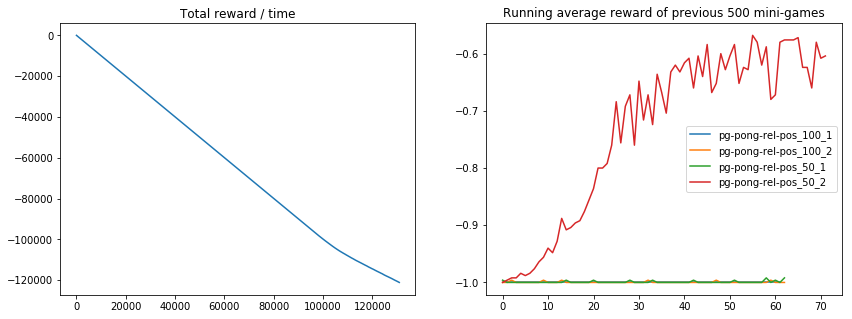

In [264]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title("Total reward / time")
plt.plot(range(len(running_reward)), running_reward)
plt.subplot(122)
plt.title("Running average reward of previous " + str(avg_over) + " mini-games")
plt.plot(range(len(running_means[0])), running_means[0], label=exps[0][0])
plt.plot(range(len(running_means[1])), running_means[1], label=exps[1][0])
plt.plot(range(len(running_means[2])), running_means[2], label=exps[2][0])
plt.plot(range(len(running_means[3])), running_means[3], label=exps[3][0])
plt.legend()

In [265]:
display_timing_info(exps)

pg-pong-rel-pos_100_1 took an average of 6800 seconds or 113.3 minutes to run
pg-pong-rel-pos_100_2 took an average of 7181 seconds or 119.7 minutes to run
pg-pong-rel-pos_50_1 took an average of 6827 seconds or 113.8 minutes to run
pg-pong-rel-pos_50_2 took an average of 9019 seconds or 150.3 minutes to run


### Relative positions of other paddle and ball to agent's paddle, along with ball velocity (given by difference in ball position over successive frames), and bonus reward given for lining up the ball with the paddle when the ball is close
2 expirements with 50 hidden neurons and 2 experiments with 100 hidden neurons

In [266]:
avg_over = 500
exps = rel_pos_bonus_exps
running_reward, running_means, variances = get_exp_info(exps, num_experiments=8, avg_over=avg_over)

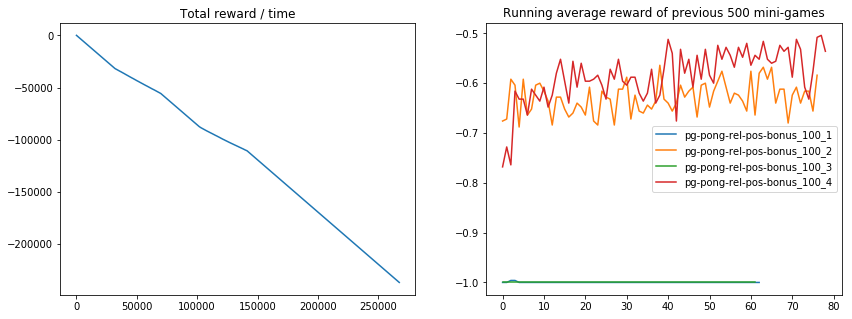

In [267]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title("Total reward / time")
plt.plot(range(len(running_reward)), running_reward)
plt.subplot(122)
plt.title("Running average reward of previous " + str(avg_over) + " mini-games")
plt.plot(range(len(running_means[0])), running_means[0], label=exps[0][0])
plt.plot(range(len(running_means[1])), running_means[1], label=exps[1][0])
plt.plot(range(len(running_means[2])), running_means[2], label=exps[2][0])
plt.plot(range(len(running_means[3])), running_means[3], label=exps[3][0])
plt.legend()

In [269]:
display_timing_info(exps, num_experiments=8)

pg-pong-rel-pos-bonus_100_1 took an average of 6847 seconds or 114.1 minutes to run
pg-pong-rel-pos-bonus_100_2 took an average of 9761 seconds or 162.7 minutes to run
pg-pong-rel-pos-bonus_100_3 took an average of 6834 seconds or 113.9 minutes to run
pg-pong-rel-pos-bonus_100_4 took an average of 10349 seconds or 172.5 minutes to run
pg-pong-rel-pos-bonus_100_5 took an average of 6807 seconds or 113.5 minutes to run
pg-pong-rel-pos-bonus_100_6 took an average of 6797 seconds or 113.3 minutes to run
pg-pong-rel-pos-bonus_50_1 took an average of 6846 seconds or 114.1 minutes to run
pg-pong-rel-pos-bonus_50_2 took an average of 6828 seconds or 113.8 minutes to run
